<a href="https://colab.research.google.com/github/osommersell264/code/blob/master/Python101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Python 101 for Excel Users
## Prepared by Martha Norrick, Mayor's Office of Data Analytics, mnorrick@cityhall.nyc.gov

In [ ]:
## Please make your own copy of this document if you want to run it alongside as we go through it!

## What's Python?

Python is a full-blown object-oriented programming langauge!  People do all sorts of things in Python, from building websites to creating data processing pipelines, building games, and more!  We are going to focus on using Python for creating replicable analysis and visualizations we might otherwise do in Excel.

To do this, we're going to use an open source document type called a "Jupyter Notebook".  The file extension for a Jupyter Notebook is .ipynb.  Jupyter notebooks are great because they can handle code, or "markdown", which is just a fancy word for pretty text, or show plots and other kinds of media.  It's also an approchable tool for learning data analysis in Python.  I'm using Google's version of Jupyter notebooks for this tutorial for ease of sharing, but you can also install it locally on your computer (pursuant to your agency's approval processes) using the [Anaconda distribution of Python](https://docs.anaconda.com/anaconda/install/), which makes it easy to launch notebooks from a user-friendly interface.

I am most decidedly not a Python expert!  But I do use Python for analysis projects and so do many other data scientists across the City and the globe, which means that for almost any question you can think of, someone has already asked and had it answered on the internet.  A good rule of thumb is to google "How to do *thing in excel* in Python using Pandas".

## What's so great about Python and why/when should I use it instead of Excel?

Great question!  There are a few really great reasons to use Python instead of Excel for data analysis.

*   Reproducability
*   Python doesn't hide formulas or guess what you mean.
*   Easy to find and fix mistakes and re-run.
*   Can handle more than the million row cap in Excel.

Python is really great for analysis where you think you might need to regenerate it again in the future, e.g. if there's updated data in the same format coming in, or if you need to handle data that's too big to handle in Excel.  It's also great for exploratory analysis because a lot of things that take multiple clicks/commands in Excel are just one line of code.

### Okay, let's dive in!

Let's start with some very basic stuff about Python.  Python gives you the ability to store information in very handy ways, by giving it a name that you can then use to refer to that information throughout your program.  For example, I can create a object with the name  "cat_name" and set it equal to my cat's name, Mookie Wilson, and an object "cat_age" and set it to 6.  To "execute" the cell, you hit "shift + enter" and that little snippet of code runs!

In [ ]:
cat_name = "Mookie Wilson"
cat_age = 6

Now that I've set the variable "cat_name" to my cat's name, I can recall it by asking Python to print the name and age again, or to tell me what kind of data is stored as that variable.  We'll talk a little more about data types in a minute!

In [ ]:
print(cat_name)
print(cat_age)
print("My cat's name is "+cat_name+" and he is "+str(cat_age)+" years old.")

Mookie Wilson
6
My cat's name is Mookie Wilson and he is 6 years old.


Now that we've done the very very basic part, let's move into analyzing a dataset.  To start with, we have to have the right tools, which means importing the packages we need.  Python packages are kind of like add-ins to the core functionality of Python, and there are hundreds of thousands of them available in the open source [package index](https://pypi.org/).  Again, googling "python package that does X" usually bears fruit!  

Let's install the Pandas package, which is the bread and butter of any data scientist, and also the package that has the most overlap with Excel.  Pandas uses the functions of another very standard package called Numpy which we will import as well.

In [ ]:
## importing a library
## the command is "import" and if the package has a long name, you can give it a nickname using "as"!
## Pandas is the package that data analysts use all the time and it's frequently nicknamed "pd".
## Ditto with Numpy!  affectionately nicknamed "np"
import pandas as pd
import numpy as np

### Okay, now we're ready to dive in!  Let's start with getting data in!

In Pandas, a single excel worksheet is called a dataframe.  Pandas can read in data from multiple different formats, but we frequently get data as a csv or an excel workbook.  I'm going to show how to read in a csv and excel workbook, with the caveat that it's slightly different in Colab but I'll show you how you'd do it from your local machine also.

For running a notebook on your local machine, the command to read data is either:
```
nickname_for_your_data = pd.read_csv('path_to_your_csv_file')
```
or:
```
nickname_for_your_data = pd.read_excel('path_to_your_excel_file', sheet_name="name of sheet")
```


For example, the command below would read a csv copy of the 311 Open Data file from my local machine and save it as a dataframe named all_requests.  

Note!  This file is too big to open in Excel!  Python already helping us out!

In [ ]:
all_requests = pd.read_csv('C:\Users\mnorrick\Downloads\311_Service_Requests_from_2010_to_Present.csv')

To load data in Colab, we use a few extra helpers to get the data into the cloud.  **VERY IMPORTANT NOTE: Do not load PII or confidential information into Colab! Use a local installation to work with files that need to stay in the secure City environment.**  What I am about to do is okay since it's all Open Data.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
all_requests = pd.read_csv(io.BytesIO(uploaded['311_Service_Requests_from_2010_to_Present.csv']))
# Dataset is now stored in a Pandas Dataframe

To make things even easier, if data is already online, you can use Pandas to read it straight from the URL of the Open Data API!  If you're interested in more ways this can work, the session this afternoon on Open Source APIs can teach you more!

In [ ]:
all_requests = pd.read_csv('https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$limit=10000')

Because big data can take a bit to load into Colab (this is not the case on a local machine!) we're going to use this sample of 10,000 rows of 311 data to demonstrate some of the functions you'd do in Excel in Pandas.

### Common functions in Excel and their Pandas versions.

First things first, let's take a look at our data.  In Excel, we'd just open the spreadsheet and take a look.  In Pandas, we can do similar things with a few different functions.  Let's start by taking a peek at the first few rows of our data using the command .head()

In [ ]:
all_requests.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,52213010,2021-10-18T12:00:00.000,NaN,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11361.0,36-05 218 STREET,218 STREET,36 AVENUE,38 AVENUE,NaN,NaN,ADDRESS,Bayside,NaN,NaN,Open,NaN,The Department of Sanitation is in the process...,2021-10-18T12:00:00.000,11 QUEENS,4.061890e+09,QUEENS,1049038.0,219526.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.768987,-73.766103,"\n, \n(40.76898712574411, -73.76610287376835)"
1,52211343,2021-10-18T12:00:00.000,NaN,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,NaN,NaN,NaN,NaN,NaN,HAVEN AVENUE,HAVEN AVENUE,INTERSECTION,NaN,NaN,NaN,Open,NaN,The Department of Sanitation is in the process...,2021-10-18T12:00:00.000,12 MANHATTAN,NaN,MANHATTAN,NaN,NaN,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52214577,2021-10-18T01:59:35.000,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Store/Commercial,11385.0,56-53 MYRTLE AVENUE,MYRTLE AVENUE,CATALPA AVENUE,HANCOCK STREET,CATALPA AVENUE,HANCOCK STREET,ADDRESS,RIDGEWOOD,MYRTLE AVENUE,NaN,In Progress,NaN,NaN,NaN,05 QUEENS,4.034640e+09,QUEENS,1010750.0,194440.0,MOBILE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.700330,-73.904429,"\n, \n(40.70032997379337, -73.90442852970237)"
3,52214585,2021-10-18T01:59:17.000,NaN,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11205.0,470 DEKALB AVENUE,DEKALB AVENUE,KENT AVENUE,FRANKLIN AVENUE,KENT AVENUE,FRANKLIN AVENUE,ADDRESS,BROOKLYN,DEKALB AVENUE,NaN,In Progress,NaN,NaN,NaN,03 BROOKLYN,3.019380e+09,BROOKLYN,995994.0,190899.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.690643,-73.957652,"\n, \n(40.690642637743004, -73.95765176984638)"
4,52217182,2021-10-18T01:58:29.000,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11208.0,737 ATKINS AVENUE,ATKINS AVENUE,WORTMAN AVENUE,COZINE AVENUE,WORTMAN AVENUE,COZINE AVENUE,ADDRESS,BROOKLYN,ATKINS AVENUE,NaN,In Progress,NaN,NaN,NaN,05 BROOKLYN,3.045430e+09,BROOKLYN,1019724.0,180209.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661238,-73.872139,"\n, \n(40.66123772828544, -73.87213901729686)"


If we want to take a quick look at all the columns in this dataframe and their data types, we can use .info().  To see some quick summary statistics for numeric columns, we can use .describe()

In [ ]:
all_requests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      10000 non-null  int64  
 1   created_date                    10000 non-null  object 
 2   closed_date                     7508 non-null   object 
 3   agency                          10000 non-null  object 
 4   agency_name                     10000 non-null  object 
 5   complaint_type                  10000 non-null  object 
 6   descriptor                      9665 non-null   object 
 7   location_type                   9250 non-null   object 
 8   incident_zip                    9675 non-null   float64
 9   incident_address                9569 non-null   object 
 10  street_name                     9569 non-null   object 
 11  cross_street_1                  9377 non-null   object 
 12  cross_street_2                  9

In [ ]:
all_requests.describe()

,unique_key,incident_zip,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude
count,1.000000e+04,9675.000000,8.522000e+03,9.863000e+03,9866.000000,9863.000000,9863.000000
mean,5.221142e+07,10817.954729,2.719689e+09,1.005923e+06,207104.963308,40.735071,-73.921767
std,4.865930e+03,557.329867,1.208819e+09,2.145709e+04,28792.526145,0.079041,0.077389
min,5.212587e+07,10000.000000,1.000020e+09,9.140840e+05,121883.000000,40.500966,-74.252343
25%,5.220766e+07,10306.000000,2.024470e+09,9.918030e+05,187155.000000,40.680314,-73.972789
50%,5.221234e+07,11205.000000,3.020930e+09,1.004580e+06,205273.000000,40.730035,-73.926539
75%,5.221539e+07,11238.000000,4.015238e+09,1.019888e+06,230060.750000,40.798183,-73.871395
max,5.221875e+07,11694.000000,5.270001e+09,1.066885e+06,270929.000000,40.910265,-73.701762


### Common Excel Use Case: Filtering Data

Let's say I work at Parks and I only want to see the service requests that are relevant to my agency.  To filter a dataframe, the best practice is to use a function called .loc.  Loc can filter in a few different ways, but to filter all rows based on a column value, we can use the following:

In [ ]:
all_requests.loc[all_requests['agency'] == 'DPR']

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
10,52215093,2021-10-18T01:56:03.000,NaN,DPR,Department of Parks and Recreation,Damaged Tree,Tree Alive - in Poor Condition,Street,11207.0,1133 DECATUR STREET,DECATUR STREET,EVERGREEN AVENUE,CENTRAL AVENUE,EVERGREEN AVENUE,CENTRAL AVENUE,ADDRESS,BROOKLYN,DECATUR STREET,NaN,In Progress,NaN,NaN,NaN,04 BROOKLYN,3.034280e+09,BROOKLYN,1009568.0,189801.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687600,-73.908709,"\n, \n(40.68760046066466, -73.90870881069473)"
92,52216332,2021-10-18T01:06:19.000,NaN,DPR,Department of Parks and Recreation,Uprooted Stump,Remove Stump,Street,11220.0,472 58 STREET,58 STREET,4 AVENUE,5 AVENUE,4 AVENUE,5 AVENUE,ADDRESS,BROOKLYN,58 STREET,NaN,In Progress,NaN,NaN,NaN,07 BROOKLYN,3.008550e+09,BROOKLYN,979897.0,172825.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.641040,-74.015685,"\n, \n(40.64104024616409, -74.01568501419)"
99,52216240,2021-10-18T01:03:08.000,NaN,DPR,Department of Parks and Recreation,Uprooted Stump,Remove Stump,Street,11220.0,418 58 STREET,58 STREET,4 AVENUE,5 AVENUE,4 AVENUE,5 AVENUE,ADDRESS,BROOKLYN,58 STREET,NaN,In Progress,NaN,NaN,NaN,07 BROOKLYN,3.008550e+09,BROOKLYN,979656.0,173017.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.641567,-74.016554,"\n, \n(40.641567123257836, -74.01655353186271)"
109,52213610,2021-10-18T00:57:37.000,NaN,DPR,Department of Parks and Recreation,Uprooted Stump,Remove Stump,Street,11220.0,5617 5 AVENUE,5 AVENUE,56 STREET,57 STREET,56 STREET,57 STREET,ADDRESS,BROOKLYN,5 AVENUE,NaN,In Progress,NaN,NaN,NaN,07 BROOKLYN,3.008400e+09,BROOKLYN,980376.0,173026.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.641592,-74.013959,"\n, \n(40.641592170519054, -74.01395916551978)"
133,52217850,2021-10-18T00:50:28.000,NaN,DPR,Department of Parks and Recreation,Dead/Dying Tree,Planted More Than 2 Years Ago,Street,10308.0,36 GENESEE AVENUE,GENESEE AVENUE,BROOKFIELD AVENUE,ABINGDON AVENUE,BROOKFIELD AVENUE,ABINGDON AVENUE,ADDRESS,STATEN ISLAND,GENESEE AVENUE,NaN,In Progress,NaN,NaN,NaN,03 STATEN ISLAND,5.054550e+09,STATEN ISLAND,940595.0,141199.0,UNKNOWN,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.554127,-74.157096,"\n, \n(40.554126896120216, -74.1570960139767)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9906,52205516,2021-10-16T14:16:05.000,NaN,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11377.0,BIG BUSH PLAYGROUND,BIG BUSH PLAYGROUND,63 STREET,47 AVENUE,63 STREET,47 AVENUE,UNRECOGNIZED,WOODSIDE,BIG BUSH PLAYGROUND,NaN,In Progress,NaN,NaN,NaN,02 QUEENS,4.128020e+09,QUEENS,1011233.0,208751.0,ONLINE,Big Bush Playground,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739609,-73.902629,"\n, \n(40.73960873710535, -73.90262923510105)"
9922,52206438,2021-10-16T14:12:30.000,NaN,DPR,Department of Parks and Recreation,Overgrown Tree/Branches,Hitting Power Lines,Street,11419.0,94-15 120 STREET,120 STREET,94 AVENUE,95 AVENUE,94 AVENUE,95 AVENUE,ADDRESS,SOUTH RICHMOND HILL,120 STREET,NaN,In Progress,NaN,NaN,NaN,09 QUEENS,4.094380e+09,QUEENS,1032318.0,192071.0,ONLINE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.693737,-73.826661,"\n, \n(40.69373676074222, -73.82666123624787)"
9972,52202488,2021-10-16T14:02:49.000,NaN,DPR,Department of Parks and Recreation

To save a version of the dataframe that only has the Parks data, we assign that selection a new name and specify that we want a new copy!

In [ ]:
parks_requests = all_requests.loc[all_requests['agency'] == 'DPR'].copy()

In [ ]:
parks_requests.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
10,52215093,2021-10-18T01:56:03.000,NaN,DPR,Department of Parks and Recreation,Damaged Tree,Tree Alive - in Poor Condition,Street,"11,207",1133 DECATUR STREET,DECATUR STREET,EVERGREEN AVENUE,CENTRAL AVENUE,EVERGREEN AVENUE,CENTRAL AVENUE,ADDRESS,BROOKLYN,DECATUR STREET,NaN,In Progress,NaN,NaN,NaN,04 BROOKLYN,"3,034,280,055",BROOKLYN,"1,009,568","189,801",PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.68760046066466, -73.90870881069473)"
92,52216332,2021-10-18T01:06:19.000,NaN,DPR,Department of Parks and Recreation,Uprooted Stump,Remove Stump,Street,"11,220",472 58 STREET,58 STREET,4 AVENUE,5 AVENUE,4 AVENUE,5 AVENUE,ADDRESS,BROOKLYN,58 STREET,NaN,In Progress,NaN,NaN,NaN,07 BROOKLYN,"3,008,550,035",BROOKLYN,"979,897","172,825",ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.64104024616409, -74.01568501419)"
99,52216240,2021-10-18T01:03:08.000,NaN,DPR,Department of Parks and Recreation,Uprooted Stump,Remove Stump,Street,"11,220",418 58 STREET,58 STREET,4 AVENUE,5 AVENUE,4 AVENUE,5 AVENUE,ADDRESS,BROOKLYN,58 STREET,NaN,In Progress,NaN,NaN,NaN,07 BROOKLYN,"3,008,550,013",BROOKLYN,"979,656","173,017",ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.641567123257836, -74.01655353186271)"
109,52213610,2021-10-18T00:57:37.000,NaN,DPR,Department of Parks and Recreation,Uprooted Stump,Remove Stump,Street,"11,220",5617 5 AVENUE,5 AVENUE,56 STREET,57 STREET,56 STREET,57 STREET,ADDRESS,BROOKLYN,5 AVENUE,NaN,In Progress,NaN,NaN,NaN,07 BROOKLYN,"3,008,400,003",BROOKLYN,"980,376","173,026",ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.641592170519054, -74.01395916551978)"
133,52217850,2021-10-18T00:50:28.000,NaN,DPR,Department of Parks and Recreation,Dead/Dying Tree,Planted More Than 2 Years Ago,Street,"10,308",36 GENESEE AVENUE,GENESEE AVENUE,BROOKFIELD AVENUE,ABINGDON AVENUE,BROOKFIELD AVENUE,ABINGDON AVENUE,ADDRESS,STATEN ISLAND,GENESEE AVENUE,NaN,In Progress,NaN,NaN,NaN,03 STATEN ISLAND,"5,054,550,005",STATEN ISLAND,"940,595","141,199",UNKNOWN,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.554126896120216, -74.1570960139767)"


What if I want to filter on multiple conditions?  We can do that!  Pandas handles boolean operators including OR, which Excel doesn't play nice with!

In [ ]:
#and example
parks_requests.loc[(parks_requests['complaint_type'] == 'Damaged Tree') & (parks_requests['city']=='BROOKLYN')]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
10,52215093,2021-10-18T01:56:03.000,NaN,DPR,Department of Parks and Recreation,Damaged Tree,Tree Alive - in Poor Condition,Street,"11,207",1133 DECATUR STREET,DECATUR STREET,EVERGREEN AVENUE,CENTRAL AVENUE,EVERGREEN AVENUE,CENTRAL AVENUE,ADDRESS,BROOKLYN,DECATUR STREET,NaN,In Progress,NaN,NaN,NaN,04 BROOKLYN,"3,034,280,055",BROOKLYN,"1,009,568","189,801",PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.68760046066466, -73.90870881069473)"
398,52213258,2021-10-17T23:42:58.000,NaN,DPR,Department of Parks and Recreation,Damaged Tree,Tree Leaning/Uprooted,Street,"11,225",30 LAMONT COURT,LAMONT COURT,EMPIRE BOULEVARD,LEFFERTS AVENUE,EMPIRE BOULEVARD,LEFFERTS AVENUE,ADDRESS,BROOKLYN,LAMONT COURT,NaN,In Progress,NaN,NaN,NaN,09 BROOKLYN,"3,013,240,010",BROOKLYN,"999,740","180,954",MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.66334010055166, -73.94416675662188)"
406,52215204,2021-10-17T23:41:33.000,NaN,DPR,Department of Parks and Recreation,Damaged Tree,Tree Leaning/Uprooted,Street,"11,225",421 CROWN STREET,CROWN STREET,BROOKLYN AVENUE,KINGSTON AVENUE,BROOKLYN AVENUE,KINGSTON AVENUE,ADDRESS,BROOKLYN,CROWN STREET,NaN,In Progress,NaN,NaN,NaN,09 BROOKLYN,"3,012,920,001",BROOKLYN,"999,541","181,913",MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.66597268828634, -73.94488187097673)"
1832,52214275,2021-10-17T20:01:20.000,NaN,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,"11,238",475 STERLING PLACE,STERLING PLACE,WASHINGTON AVENUE,FRANK AND DORIS BELL WAY,WASHINGTON AVENUE,FRANK AND DORIS BELL WAY,ADDRESS,BROOKLYN,STERLING PLACE,NaN,In Progress,NaN,NaN,NaN,08 BROOKLYN,"3,011,677,501",BROOKLYN,"994,714","184,982",ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.674403427199266, -73.9622765685923)"
2196,52214274,2021-10-17T19:05:06.000,NaN,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,"11,209",8406 4 AVENUE,4 AVENUE,84 STREET,85 STREET,84 STREET,85 STREET,ADDRESS,BROOKLYN,4 AVENUE,NaN,In Progress,NaN,NaN,NaN,10 BROOKLYN,nan,BROOKLYN,"976,534","166,684",ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.62418221164037, -74.02779577361942)"
2608,52212411,2021-10-17T17:43:49.000,NaN,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,"11,238",475 STERLING PLACE,STERLING PLACE,WASHINGTON AVENUE,FRANK AND DORIS BELL WAY,WASHINGTON AVENUE,FRANK AND DORIS BELL WAY,ADDRESS,BROOKLYN,STERLING PLACE,NaN,In Progress,NaN,NaN,NaN,08 BROOKLYN,"3,011,677,501",BROOKLYN,"994,714","184,982",MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.674403427199266, -73.9622765685923)"
2936,52215944,2021-10-17T16:37:29.000,NaN,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,"11,221",74 GROVE STREET,GROVE STREET,BUSHWICK AVENUE,EVERGREEN AVENUE,BUSHWICK AVENUE,EVERGREEN AVENUE,ADDRESS,BROOKLYN,GROVE STREET,NaN,In Progress,NaN,NaN,NaN,04 BROOKLYN,"3,033,220,008",BROOKLYN,"1,005,955","191,517",ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.69232008141145, -73.92173096502643)"
2937,52211421,2021-10-17T16:37:09.000,NaN,DPR,Department of Parks and Recreation,Damaged Tree,Branch or Limb Has Fallen Down,Street,"11,230",1011 OCEAN PARKWAY,OC

In [ ]:
#or example
parks_requests.loc[(parks_requests['complaint_type'] == 'Dead/Dying Tree') | (parks_requests['city'] == 'BROOKLYN')]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
10,52215093,2021-10-18T01:56:03.000,NaN,DPR,Department of Parks and Recreation,Damaged Tree,Tree Alive - in Poor Condition,Street,"11,207",1133 DECATUR STREET,DECATUR STREET,EVERGREEN AVENUE,CENTRAL AVENUE,EVERGREEN AVENUE,CENTRAL AVENUE,ADDRESS,BROOKLYN,DECATUR STREET,NaN,In Progress,NaN,NaN,NaN,04 BROOKLYN,"3,034,280,055",BROOKLYN,"1,009,568","189,801",PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.68760046066466, -73.90870881069473)"
92,52216332,2021-10-18T01:06:19.000,NaN,DPR,Department of Parks and Recreation,Uprooted Stump,Remove Stump,Street,"11,220",472 58 STREET,58 STREET,4 AVENUE,5 AVENUE,4 AVENUE,5 AVENUE,ADDRESS,BROOKLYN,58 STREET,NaN,In Progress,NaN,NaN,NaN,07 BROOKLYN,"3,008,550,035",BROOKLYN,"979,897","172,825",ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.64104024616409, -74.01568501419)"
99,52216240,2021-10-18T01:03:08.000,NaN,DPR,Department of Parks and Recreation,Uprooted Stump,Remove Stump,Street,"11,220",418 58 STREET,58 STREET,4 AVENUE,5 AVENUE,4 AVENUE,5 AVENUE,ADDRESS,BROOKLYN,58 STREET,NaN,In Progress,NaN,NaN,NaN,07 BROOKLYN,"3,008,550,013",BROOKLYN,"979,656","173,017",ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.641567123257836, -74.01655353186271)"
109,52213610,2021-10-18T00:57:37.000,NaN,DPR,Department of Parks and Recreation,Uprooted Stump,Remove Stump,Street,"11,220",5617 5 AVENUE,5 AVENUE,56 STREET,57 STREET,56 STREET,57 STREET,ADDRESS,BROOKLYN,5 AVENUE,NaN,In Progress,NaN,NaN,NaN,07 BROOKLYN,"3,008,400,003",BROOKLYN,"980,376","173,026",ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.641592170519054, -74.01395916551978)"
133,52217850,2021-10-18T00:50:28.000,NaN,DPR,Department of Parks and Recreation,Dead/Dying Tree,Planted More Than 2 Years Ago,Street,"10,308",36 GENESEE AVENUE,GENESEE AVENUE,BROOKFIELD AVENUE,ABINGDON AVENUE,BROOKFIELD AVENUE,ABINGDON AVENUE,ADDRESS,STATEN ISLAND,GENESEE AVENUE,NaN,In Progress,NaN,NaN,NaN,03 STATEN ISLAND,"5,054,550,005",STATEN ISLAND,"940,595","141,199",UNKNOWN,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.554126896120216, -74.1570960139767)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9534,52205529,2021-10-16T15:30:06.000,NaN,DPR,Department of Parks and Recreation,Maintenance or Facility,Rodent Sighting,Park,"11,222",MSGR MCGOLRICK PARK,MSGR MCGOLRICK PARK,DRIGGS AVENUE,NASSAU AVENUE,DRIGGS AVENUE,NASSAU AVENUE,UNRECOGNIZED,BROOKLYN,MONSIGNOR MCGOLRICK PARK,NaN,In Progress,NaN,NaN,NaN,01 BROOKLYN,"3,026,870,001",BROOKLYN,"999,951","203,215",ONLINE,Msgr. McGolrick Park,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.724441004030766, -73.94335432615917)"
9643,52207945,2021-10-16T15:09:47.000,NaN,DPR,Department of Parks and Recreation,Damaged Tree,Branch Cracked and Will Fall,Street,"11,229",2226 EAST 29 STREET,EAST 29 STREET,AVENUE V,AVENUE W,AVENUE V,AVENUE W,ADDRESS,BROOKLYN,EAST 29 STREET,NaN,In Progress,NaN,NaN,NaN,15 BROOKLYN,"3,073,860,017",BROOKLYN,"1,000,262","156,929",PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,-74,"\n, \n(40.597395638260544, -73.94234222337651)"
9795,52208078,2021-10-16T14:38:31.000,NaN,DPR,Department of Parks and Recreation,Dead/Dying Tree,Planted More T

### Common Excel Use Case: Pivot Tables



A thing you'd frequently do with in Excel is maybe take a quick look to see how often specific values appear in a column, e.g. make a pivot table!  Luckily Pandas has easy ways to do this.  A couple examples below:

In [ ]:
#let's see the distribution of complaint types!
parks_requests.groupby('complaint_type')['unique_key'].count()

complaint_type
Animal in a Park                 10
Damaged Tree                     58
Dead/Dying Tree                  24
Illegal Tree Damage              17
Maintenance or Facility          54
New Tree Request                 30
Overgrown Tree/Branches          38
Root/Sewer/Sidewalk Condition    11
Uprooted Stump                    4
Violation of Park Rules          18
Wood Pile Remaining               1
Name: unique_key, dtype: int64

In [ ]:
#let's group by more than one variable!
parks_requests.groupby(['borough','complaint_type'])['unique_key'].count()

borough        complaint_type               
BRONX          Damaged Tree                      4
               Illegal Tree Damage               1
               Maintenance or Facility           3
               Overgrown Tree/Branches           3
               Root/Sewer/Sidewalk Condition     1
               Violation of Park Rules           2
BROOKLYN       Animal in a Park                  2
               Damaged Tree                     24
               Dead/Dying Tree                   6
               Illegal Tree Damage               3
               Maintenance or Facility          22
               New Tree Request                  7
               Overgrown Tree/Branches          15
               Root/Sewer/Sidewalk Condition     5
               Uprooted Stump                    3
               Violation of Park Rules           2
MANHATTAN      Animal in a Park                  3
               Dead/Dying Tree                   4
               Illegal Tree Damage   

In [ ]:
#Let's add a column!
pd.pivot_table(parks_requests, values='unique_key', index='complaint_type', columns='borough',aggfunc='count', fill_value=0)

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
complaint_type,,,,,
Animal in a Park,0,2,3,4,1
Damaged Tree,4,24,0,26,4
Dead/Dying Tree,0,6,4,10,4
Illegal Tree Damage,1,3,1,10,2
Maintenance or Facility,3,22,18,10,1
New Tree Request,0,7,15,6,2
Overgrown Tree/Branches,3,15,1,16,3
Root/Sewer/Sidewalk Condition,1,5,0,3,2
Uprooted Stump,0,3,0,1,0


### Common Excel Use Case: Formulas

How many times have you discovered a half-dragged formula in a spreadsheet, or the formula switches halfway and you don't discover until you've sent it to someone and have to do the whole Excel problem song and dance?  Never again with Pandas!

In Pandas, we can just use the column name to apply a formula to the whole shebang!  For example, let's check the length of the zip code column to see if there's any problematic zip codes.  Before we do that, we're going to a little trick since that column is currently stored as a float and we want it to be a string (it doesn't make sense to do mathematical operations on a zip code!)

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
parks_requests.loc[:,'incident_zip_string'] = parks_requests.loc[:,'incident_zip'].astype('Int64').astype('str')

In [ ]:
parks_requests['incident_zip_string'].head(20)

10      11207
92      11220
99      11220
109     11220
133     10308
398     11225
406     11225
645     11214
819     10024
881     11375
946     10307
1048    11219
1083    10037
1149    11201
1390    11234
1437    11208
1479    11230
1532    11423
1819    11361
1832    11238
Name: incident_zip_string, dtype: object

Now to check out the length of the strings in the entire column, I can use a formula against the entire column in one swoop!

In [ ]:
parks_requests['incident_zip_string'].str.len()

10      5
92      5
99      5
109     5
133     5
       ..
9906    5
9922    5
9972    5
9976    5
9983    5
Name: incident_zip_string, Length: 265, dtype: int64

I can even chain together what we learned with GroupBy with the statement above to see how many columns have fewer than 5 characters in the zip code.

In [ ]:
parks_requests.groupby(parks_requests.incident_zip_string.str.len())['unique_key'].count()

incident_zip_string
5    265
Name: unique_key, dtype: int64

Hooray!  All zip codes have 5 digits!  NOTE: this doesn't tell you if there are blanks.  But we can check!

In [ ]:
parks_requests.incident_zip_string.isna().sum()

0

In [ ]:
parks_requests.shape

(265, 42)

Hooray! No blanks!  We can also use a column to make another column using if/then logic.  For example, my home zip code is 11201.  If I want to make a column that indicates whether or not the zip code of the incident is in my zip code, I could do this:

In [ ]:
parks_requests['home_zip'] = np.where(parks_requests['incident_zip_string'] == '11201', 'yes', 'no')

### Common Excel Use Case: Dropping Duplicates

For this example, I'm going to make a little fake data for us to use, since the 311 data doesn't have duplicates.

In [ ]:
agency_example = pd.DataFrame({
    'agency': ['DPR', 'DPR', 'DEP', 'DEP', 'DSS'],
    'odc_status': ['yes', 'yes', 'yes', 'yes', 'yes'],
    'data_employees': [20, 20, 25, 15, 5]
})

In [ ]:
agency_example

,agency,odc_status,data_employees
0,DPR,yes,20
1,DPR,yes,20
2,DEP,yes,25
3,DEP,yes,15
4,DSS,yes,5


The default is to remove duplicates based on all four columns.  How many duplicates would we expect?

In [ ]:
agency_example.drop_duplicates()

,agency,odc_status,data_employees
0,DPR,yes,20
2,DEP,yes,25
3,DEP,yes,15
4,DSS,yes,5


To remove duplicates based on specific columns, use the argument "subset" inside the drop_duplicates()

In [ ]:
agency_example.drop_duplicates(subset='agency')
#you can also use two different columns, but you'll have to pass it as a list, e.g. ['agency','odc_status']

,agency,odc_status,data_employees
0,DPR,yes,20
2,DEP,yes,25
4,DSS,yes,5


To keep the last occurence instead of the first occurence, use "subset" and "keep"

In [ ]:
agency_example.drop_duplicates(subset='agency', keep='last')

,agency,odc_status,data_employees
1,DPR,yes,20
3,DEP,yes,15
4,DSS,yes,5


### Common Excel Use Case: Renaming Columns

Sometimes our data doesn't come with the best names! It's nice to be able to rename columns since we reference them most freuqently by name in Pandas.  First things first, we can get all the column names by calling .columns on the dataframe.

In [ ]:
parks_requests.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'facility_type', 'status', 'due_date',
       'resolution_description', 'resolution_action_updated_date',
       'community_board', 'bbl', 'borough', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'open_data_channel_type',
       'park_facility_name', 'park_borough', 'vehicle_type',
       'taxi_company_borough', 'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment',
       'latitude', 'longitude', 'location', 'incident_zip_string', 'home_zip'],
      dtype='object')

Let's say we're getting agency and agency name mixed up, and we'd like to rename one of them to be more clear.  We can use .rename on the dataframe and tell Pandas which column we want to be renamed (and what we want it to be renamed to!)

In [ ]:
parks_requests.rename(columns={'agency':'agency_acronym'}, inplace=True)
#"inplace" tells Pandas to do the operation AND store it on the object

Now if we look at the columns again, we can see that the agency column is renamed as agency_acronym.

In [ ]:
parks_requests.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency_acronym',
       'agency_name', 'complaint_type', 'descriptor', 'location_type',
       'incident_zip', 'incident_address', 'street_name', 'cross_street_1',
       'cross_street_2', 'intersection_street_1', 'intersection_street_2',
       'address_type', 'city', 'landmark', 'facility_type', 'status',
       'due_date', 'resolution_description', 'resolution_action_updated_date',
       'community_board', 'bbl', 'borough', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'open_data_channel_type',
       'park_facility_name', 'park_borough', 'vehicle_type',
       'taxi_company_borough', 'taxi_pick_up_location', 'bridge_highway_name',
       'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment',
       'latitude', 'longitude', 'location', 'incident_zip_string', 'home_zip'],
      dtype='object')

### Common Excel Use Case: VLookup or Index/Match

In Excel, if we have multiple worksheets that we need to bring together in one, you can use a common column to join data together using VLookup or Index/Match.  Pandas can do this too!  And it's even better than Excel for the following reasons:

*   The lookup value doesn’t need to be the first column of the lookup table
*   If multiple rows are matched, there will be one row for each match, instead of just the first.
*   It will include all columns from the lookup table, instead of just a single specified column
*   It supports more complex join operations

For this example, we'll also make some small fake datasets to help make this cleaner and easier to see.





In [ ]:
agency_data_1 = pd.DataFrame({"agency": ["FDNY", "DOB", "ACS", "DOE"], "data_staff": np.random.randint(low=5, high=20, size=4)})
agency_data_2 = pd.DataFrame({"agency": ["DOB", "DOE", "DOE", "DCWP"], "total_calls": np.random.randint(low=100, high=400, size=4), "average_response_time": np.random.randint(low=2, high=8, size=4)})

In [ ]:
agency_data_1

,agency,data_staff
0,FDNY,11
1,DOB,16
2,ACS,14
3,DOE,11


In [ ]:
agency_data_2

,agency,total_calls,average_response_time
0,DOB,266,3
1,DOE,225,7
2,DOE,238,6
3,DCWP,359,2


There are 4 different kinds of merges you can do in Pandas (similar to SQL if anyone is familiar).

A left join keeps all the rows in the dataframe listed first in the join and only returns the values from the second dataframe that match. 

In [ ]:
pd.merge(left=agency_data_1, right=agency_data_2, how='left', on='agency')

,agency,data_staff,total_calls,average_response_time
0,FDNY,11,nan,nan
1,DOB,16,266,3
2,ACS,14,nan,nan
3,DOE,11,225,7
4,DOE,11,238,6


A right join keeps all the rows in the dataframe listed second in the join and only returns the values from the first dataframe that match.

In [ ]:
pd.merge(left=agency_data_1, right=agency_data_2, how='right', on='agency')

,agency,data_staff,total_calls,average_response_time
0,DOB,16,266,3
1,DOE,11,225,7
2,DOE,11,238,6
3,DCWP,nan,359,2


An inner join only keeps rows that appear in both dataframes.

In [ ]:
pd.merge(left=agency_data_1, right=agency_data_2, how='inner', on='agency')

,agency,data_staff,total_calls,average_response_time
0,DOB,16,266,3
1,DOE,11,225,7
2,DOE,11,238,6


An outer join returns all rows from both dataframes.

In [ ]:
pd.merge(left=agency_data_1, right=agency_data_2, how='outer', on='agency')

,agency,data_staff,total_calls,average_response_time
0,FDNY,11,nan,nan
1,DOB,16,266,3
2,ACS,14,nan,nan
3,DOE,11,225,7
4,DOE,11,238,6
5,DCWP,nan,359,2


### Common Excel Use Case: Basic Plots

We could spend a long time on data visualization in Python!  I think that this is one of the things that is sometimes a little easier to do in Excel, but the reproducability, customization, and reproducability of a Python visualization is also really nice.

Let's make a bar chart of service requests by agency from the service request data.

In [ ]:
#first, let's group!  and make a new dataframe out of it to plot
requests_by_agency = all_requests.groupby('agency')['unique_key'].count().reset_index()
requests_by_agency.rename(columns={'unique_key':'Total Requests'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


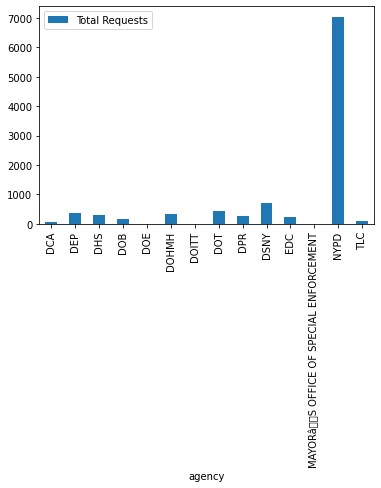

In [ ]:
requests_by_agency.plot.bar(x='agency', y='Total Requests');

What's up with that weird font in the Mayor's Office of Special Enforcement?  Welcome to the wild world of encoding.  But let's fix it by resetting the value in the dataframe.  First we find the index.

In [ ]:
requests_by_agency

,agency,Total Requests
0,DCA,69
1,DEP,354
2,DHS,288
3,DOB,176
4,DOE,5
5,DOHMH,327
6,DOITT,1
7,DOT,421
8,DPR,265
9,DSNY,703


In [ ]:
requests_by_agency.iloc[11]['agency']

'MAYORâ\x80\x99S OFFICE OF SPECIAL ENFORCEMENT'

In [ ]:
requests_by_agency.iloc[11,0] = 'MOSE'

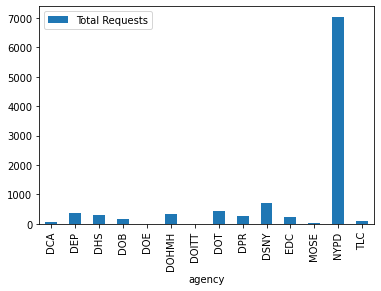

In [ ]:
requests_by_agency.plot.bar(x='agency', y='Total Requests');

Now let's say we want to use this chart in a powerpoint or something--we can export it!

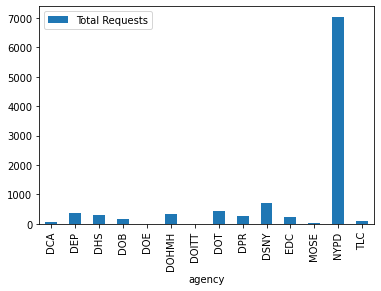

In [ ]:
requests_by_agency.plot.bar(x='agency', y='Total Requests').get_figure().savefig('requests_by_agency.png')

In [ ]:
from google.colab import files
files.download('requests_by_agency.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This again is a place where Colab is a little different--on your local machine, this would be saved in your current working directory.

### Common Excel Use Case: Exporting Data

So we've made a beautiful dataset!  Pandas makes it easy to create files from your manipulated dataframes.  One great thing about working in Python is we're not changing the underlying data--everything we're doing is on a copy of the data being stored in memory, so until we write it to a new file, it's only stored in the program, so to speak, and we don't run the risk of messing up the underlying data and not being able to get back to the beginning again.

One thing to check first is which directory we're in.  Directory is fancy computer word for "folder on your computer".  We can check that with a package called "os".

In [ ]:
import os

In [ ]:
#get our current working directory, e.g. what folder any output we're creating will be stored in
os.getcwd()

'/content'

To write our parks data out to a csv or excel, we basically do the opposite of reading in!  Instead of .read_csv() we're going to say .to_csv(), and .read_excel() becomes .to_excel()

In [ ]:
parks_requests.to_csv('park_requests.csv')
parks_requests.to_excel('parks_requests.xlsx')

### This concludes our crash course!  There is SO MUCH STUFF on the internet to help you learn this kind of thing.  I suggest finding a project you would usually do in Excel and just trying it out in Python.  Excel will be there if you need to fall back for parts or all of it, but the best and really only way to get good at this is to do it, and do it on real work.  We're here for you if you run into problems, and thanks for coming!